# Student Performance Indicator

## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
## Understand the Problem
This data set consists of the marks secured by the students in various subjects.  
To understand the influence of the parents background, test preparation etc on students performance  
  
Features used:
* Gender
* Race/Ethnicity
* Parental level of education
* Lunch
* Test preparation course

## Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977  
The data consists of 8 column and 1000 rows.

## 1.1 Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 1.2 Import Data

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1.3 Check data

* Missing values
* Duplicates
* Data type
* Number of unique values
* Statistics of data set
* Categories in categorical columns

### 1.3.1 Missing values

In [4]:
df.isna().any().sum()

0

### 1.3.2 Duplicates

In [5]:
df.duplicated().sum()

0

### 1.3.3 Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### 1.3.4 Number of unique values

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 1.3.5 Statistic of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 1.3.6 Categories in categorical columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


## 1.4 Create new features

In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
dict = {"bachelor's degree": 5,
        'some college': 3,
        "master's degree": 6,
        "associate's degree": 4,
        'high school': 2,
        'some high school': 1}
df['parental_education_level'] = df['parental level of education'].map(dict)

In [18]:
dict = {"female": 0,
        'male': 1}
df['gender'] = df['gender'].map(dict)

dict = {'group B':"B",
        'group C':"C",
        'group A':"A",
        'group D':"D",
        'group E':"E"}
df['race/ethnicity'] = df['race/ethnicity'].map(dict)

dict = {"standard": 1,
        'free/reduced': 0}
df['lunch'] = df['lunch'].map(dict)

dict = {"none": 0,
        'completed': 1}
df['test preparation course'] = df['test preparation course'].map(dict)

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,parental_education_level
0,0,B,bachelor's degree,1,0,72,72,74,5
1,0,C,some college,1,1,69,90,88,3
2,0,B,master's degree,1,0,90,95,93,6
3,1,A,associate's degree,0,0,47,57,44,4
4,1,C,some college,1,0,76,78,75,3


In [24]:
df = df.rename(columns={'race/ethnicity':'race_ethnicity',
           'test preparation course':'test_preparation_course',
           'math score':'math_score',
           'reading score':'reading_score',
           'writing score':'writing_score'})
df.head()

,gender,race_ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,parental_education_level
0,0,B,bachelor's degree,1,0,72,72,74,5
1,0,C,some college,1,1,69,90,88,3
2,0,B,master's degree,1,0,90,95,93,6
3,1,A,associate's degree,0,0,47,57,44,4
4,1,C,some college,1,0,76,78,75,3


In [25]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3

In [26]:
# Check how many students had 100
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [28]:
# Check how many had <50 and <=30
reading_less_50 = df[df['reading_score'] < 50]['average'].count()
writing_less_50 = df[df['writing_score'] < 50]['average'].count()
math_less_50 = df[df['math_score'] < 50]['average'].count()

print(f'Number of students with less than 50 marks in Maths: {math_less_50}')
print(f'Number of students with less than 50 marks in Writing: {writing_less_50}')
print(f'Number of students with less than 50 marks in Reading: {reading_less_50}')

reading_less_30 = df[df['reading_score'] <= 30]['average'].count()
writing_less_30 = df[df['writing_score'] <= 30]['average'].count()
math_less_30 = df[df['math_score'] <= 30]['average'].count()

print(f'Number of students with less than 30 marks in Maths: {math_less_30}')
print(f'Number of students with less than 30 marks in Writing: {writing_less_30}')
print(f'Number of students with less than 30 marks in Reading: {reading_less_30}')

Number of students with less than 50 marks in Maths: 135
Number of students with less than 50 marks in Writing: 114
Number of students with less than 50 marks in Reading: 90
Number of students with less than 30 marks in Maths: 16
Number of students with less than 30 marks in Writing: 10
Number of students with less than 30 marks in Reading: 8


In maths we had the worst scores and in Reading the best

In [94]:
# define numerical & categorical columns
numeric_features = df.select_dtypes(include=['int','float']).columns.to_list()
categorical_features = df.select_dtypes(exclude=['int','float']).columns.to_list()

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'parental_education_level', 'total_score', 'average']

We have 2 categorical features : ['race_ethnicity', 'parental level of education']


## 1.5 EDA

### 1.5.1 Histograms and Distributions

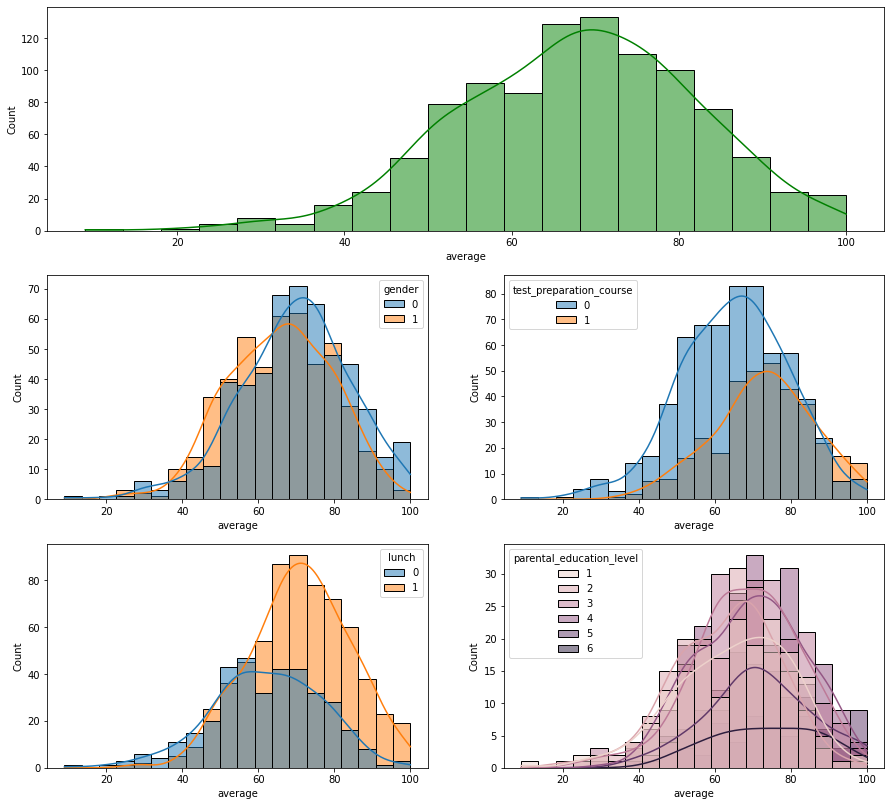

In [52]:
fig,ax = plt.subplots(3,2,figsize=(15,14))
plt.subplot(311)
sns.histplot(data=df, x='average',bins=20,kde=True,color='g')
plt.subplot(323)
sns.histplot(data=df, x='average',bins=20,kde=True,color='g', hue='gender')
plt.subplot(324)
sns.histplot(data=df, x='average',bins=20,kde=True,color='g', hue='test_preparation_course')
plt.subplot(325)
sns.histplot(data=df, x='average',bins=20,kde=True,color='g', hue='lunch')
plt.subplot(326)
sns.histplot(data=df, x='average',bins=20,kde=True,color='g', hue='parental_education_level')
plt.show()

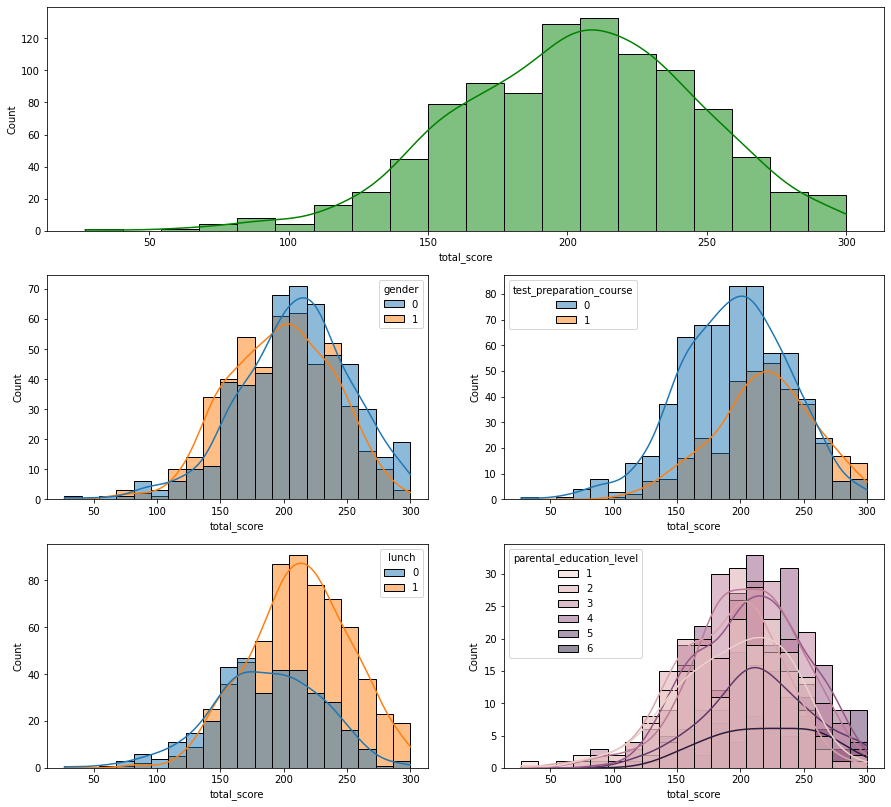

In [53]:
fig,ax = plt.subplots(3,2,figsize=(15,14))
plt.subplot(311)
sns.histplot(data=df, x='total_score',bins=20,kde=True,color='g')
plt.subplot(323)
sns.histplot(data=df, x='total_score',bins=20,kde=True,color='g', hue='gender')
plt.subplot(324)
sns.histplot(data=df, x='total_score',bins=20,kde=True,color='g', hue='test_preparation_course')
plt.subplot(325)
sns.histplot(data=df, x='total_score',bins=20,kde=True,color='g', hue='lunch')
plt.subplot(326)
sns.histplot(data=df, x='total_score',bins=20,kde=True,color='g', hue='parental_education_level')
plt.show()

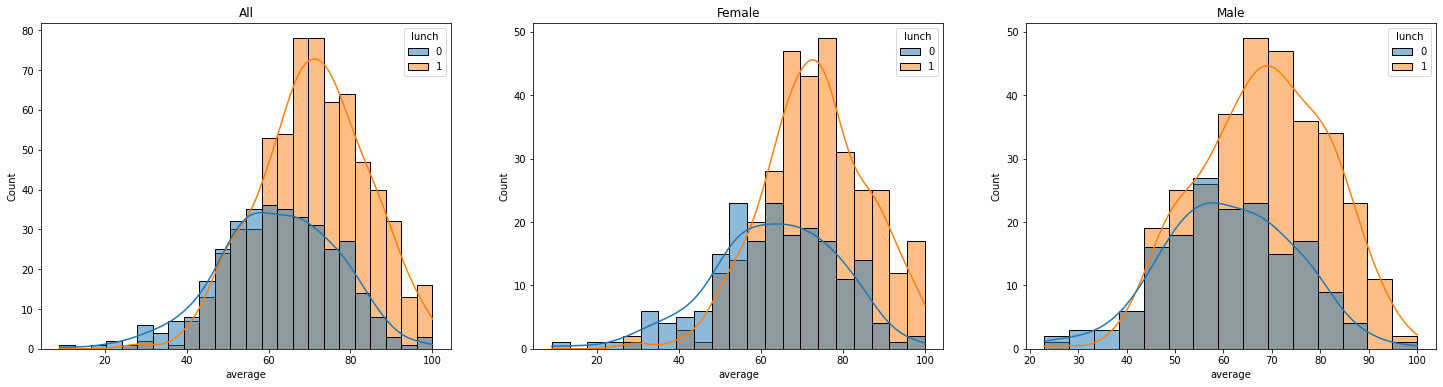

In [66]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.title('All')
plt.subplot(132)
sns.histplot(data=df[df.gender==0],x='average',kde=True,hue='lunch')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender==1],x='average',kde=True,hue='lunch')
plt.title('Male')
plt.show()

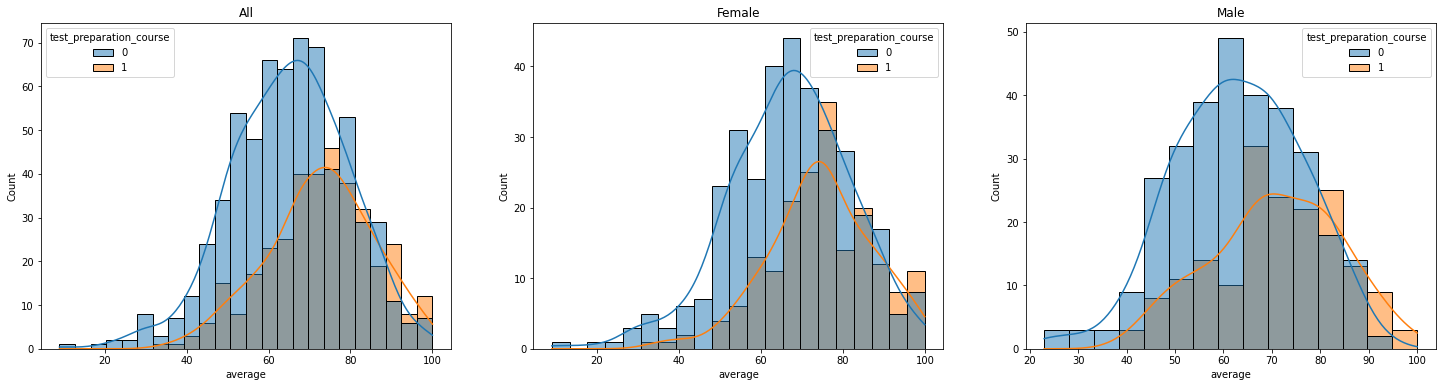

In [68]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.title('All')
plt.subplot(132)
sns.histplot(data=df[df.gender==0],x='average',kde=True,hue='test_preparation_course')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender==1],x='average',kde=True,hue='test_preparation_course')
plt.title('Male')
plt.show()

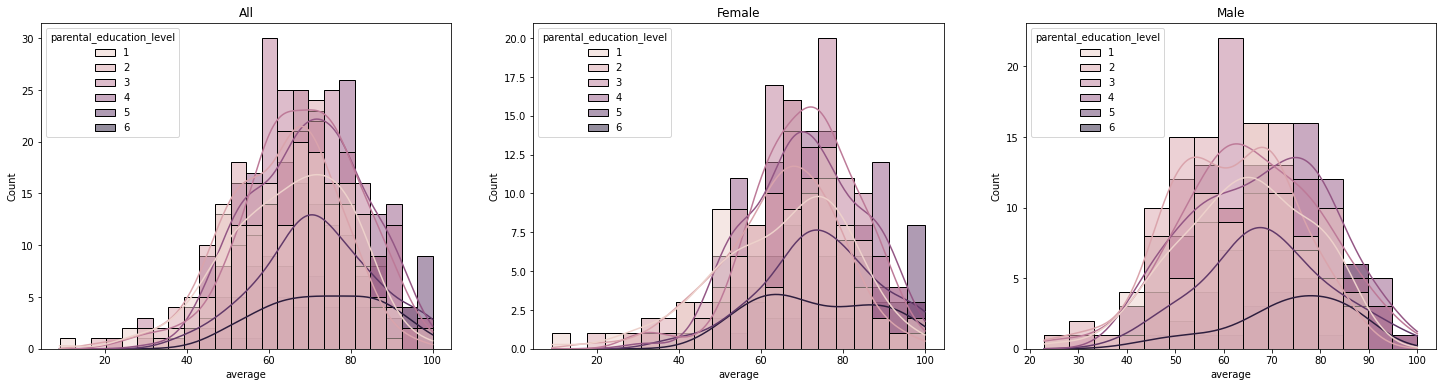

In [70]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_education_level')
plt.title('All')
plt.subplot(132)
sns.histplot(data=df[df.gender==0],x='average',kde=True,hue='parental_education_level')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender==1],x='average',kde=True,hue='parental_education_level')
plt.title('Male')
plt.show()

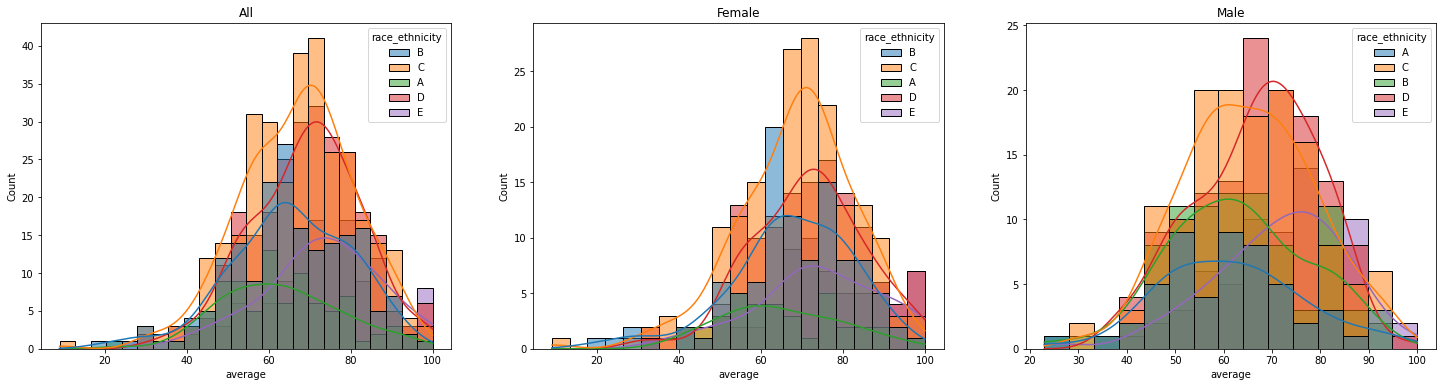

In [69]:
fig,ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.title('All')
plt.subplot(132)
sns.histplot(data=df[df.gender==0],x='average',kde=True,hue='race_ethnicity')
plt.title('Female')
plt.subplot(133)
sns.histplot(data=df[df.gender==1],x='average',kde=True,hue='race_ethnicity')
plt.title('Male')
plt.show()

Insights 
*   Females perform better than males
*   Lunch helps in the exams
*   Test preparation helps in the exams
*   The higher the parent's education the better the perform in exams
*   Race groups A and B tend to perform worse

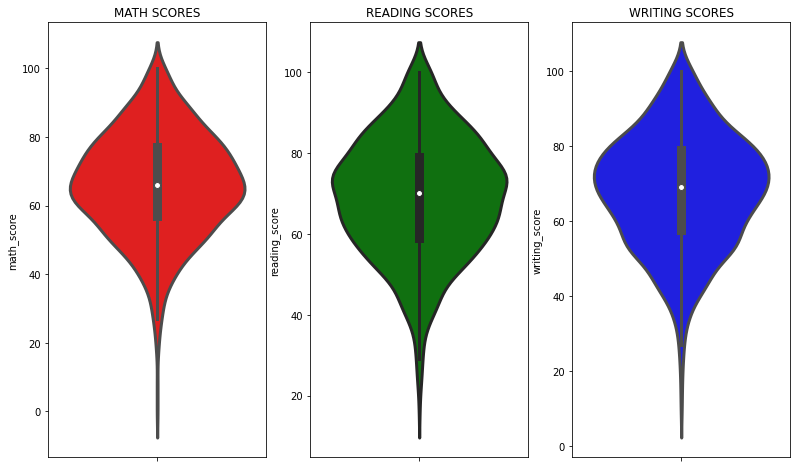

In [72]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above we can see that most students are between 50-80 score in all exams.  
Also Maths scores are worst than the other 2 and writing are best.

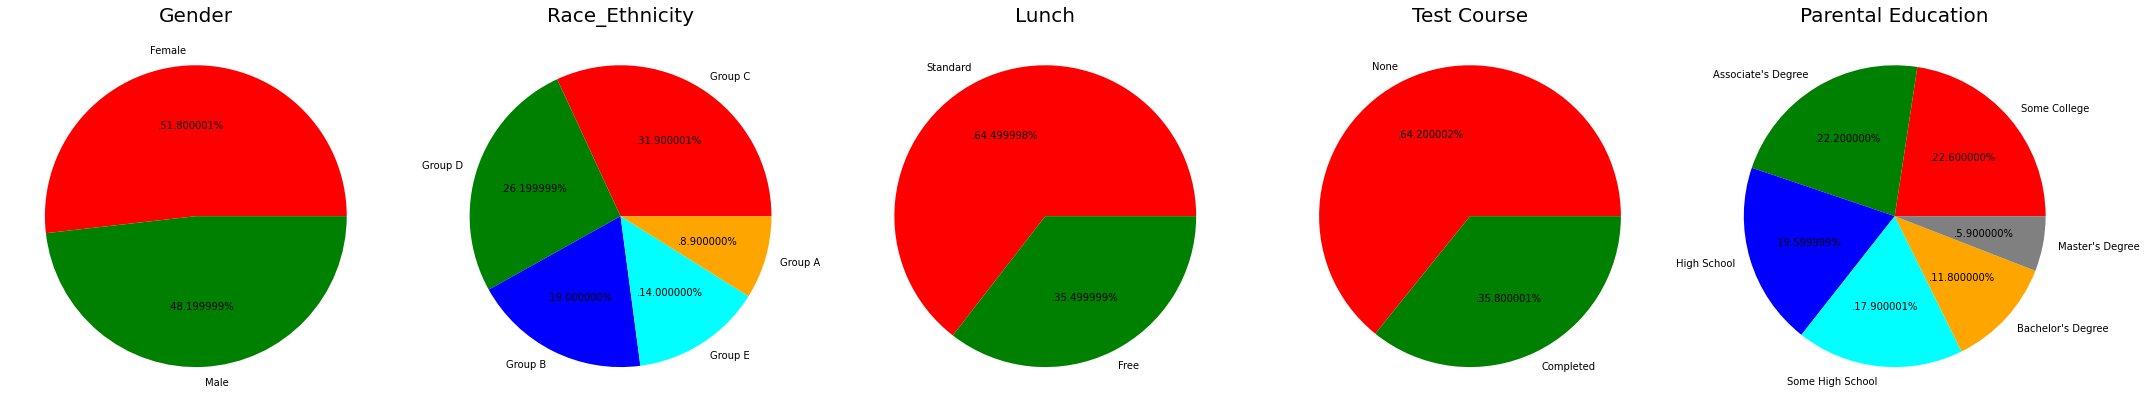

In [82]:
plt.rcParams['figure.figsize'] = (30, 12)
plt.rcParams['figure.facecolor'] = 'white'

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_education_level'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
* Number of Male and Female students is almost equal
* Number students are greatest in Group C
* Number of students who have standard lunch are greater
* Number of students who have not enrolled in any test preparation course is greater
* Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 1.6 Feature Visualization

### 1.6.1 Gender

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

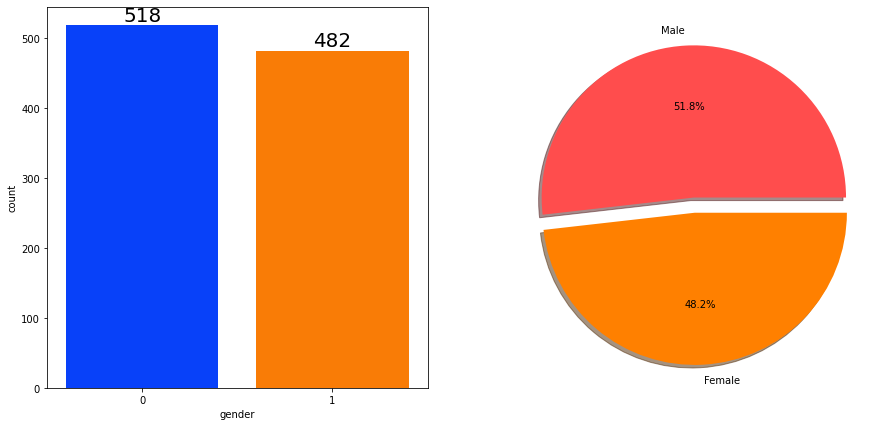

In [84]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

NameError: name 'col' is not defined

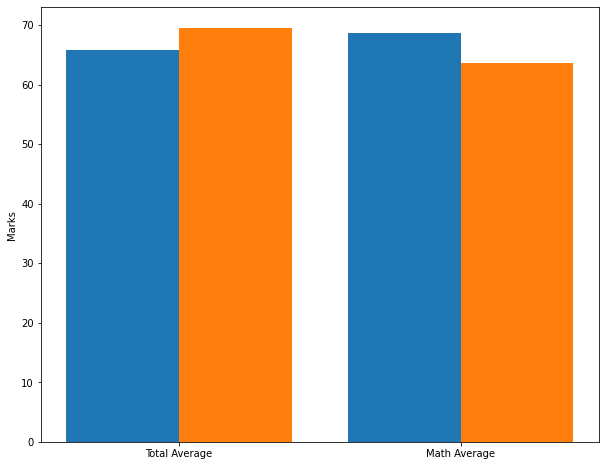

In [112]:
group = df[numeric_features].groupby('gender').mean()

plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [group['average'][0], group['math_score'][0]]
male_scores = [group['average'][1], group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks for "+col, fontweight='bold')
plt.legend()
plt.show()

### 1.6.2 Race_ethnicity

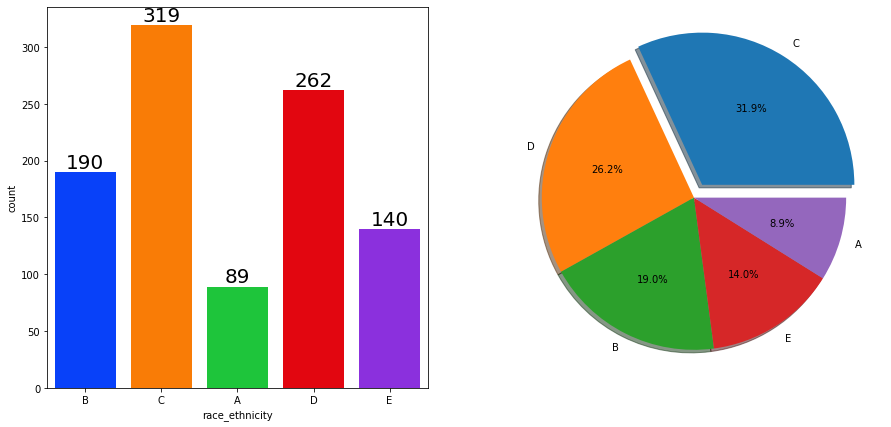

In [109]:
f,ax=plt.subplots(1,2,figsize=(15,7))
sns.countplot(x=df['race_ethnicity'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race_ethnicity'].value_counts(),labels=['C', 'D', 'B', 'E', 'A'],explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

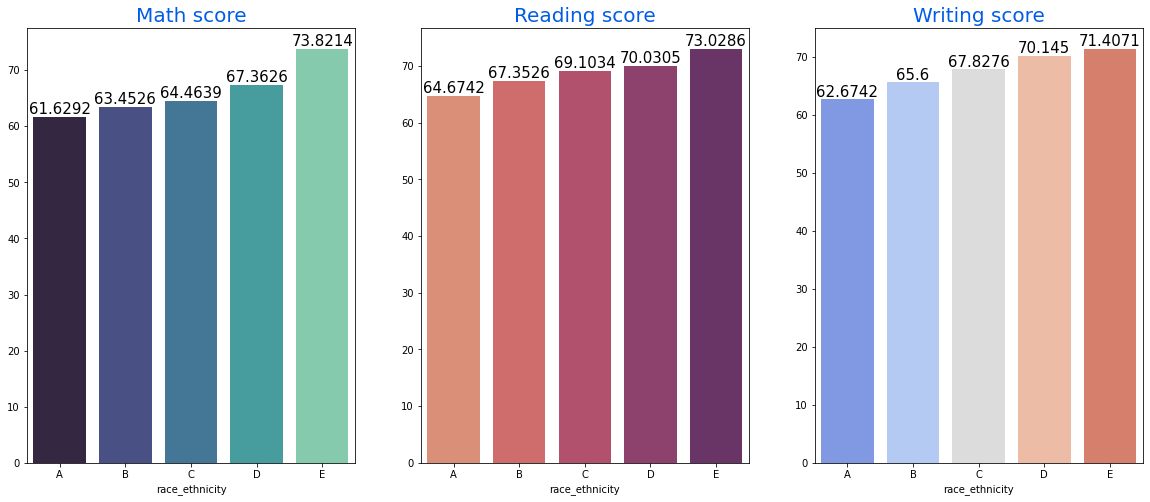

In [114]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.
* Students from a lower Socioeconomic status have a lower avg in all course subjects

### 1.6.3 PARENTAL LEVEL OF EDUCATION COLUMN

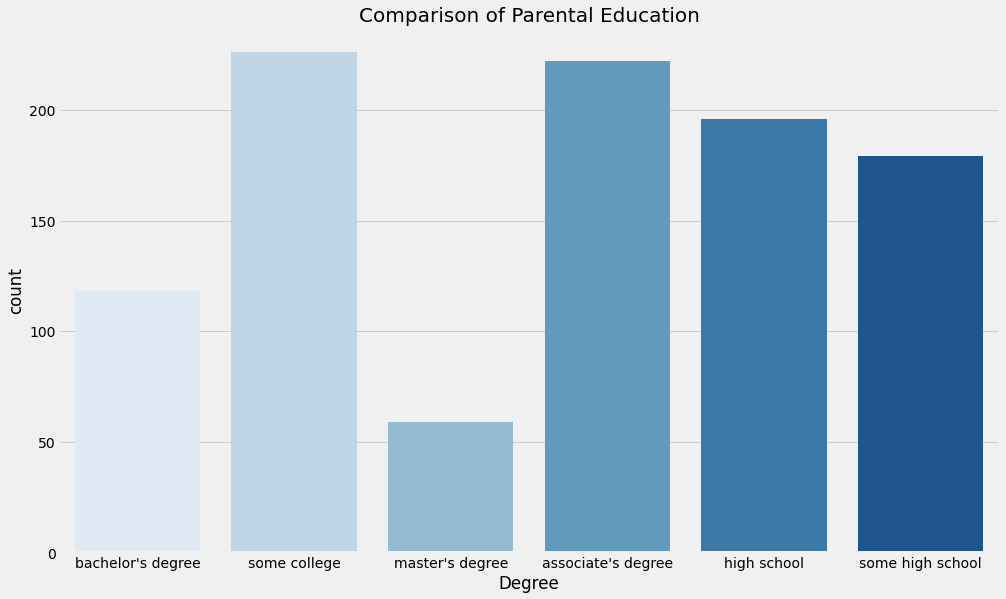

In [118]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data = df, x='parental level of education', palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

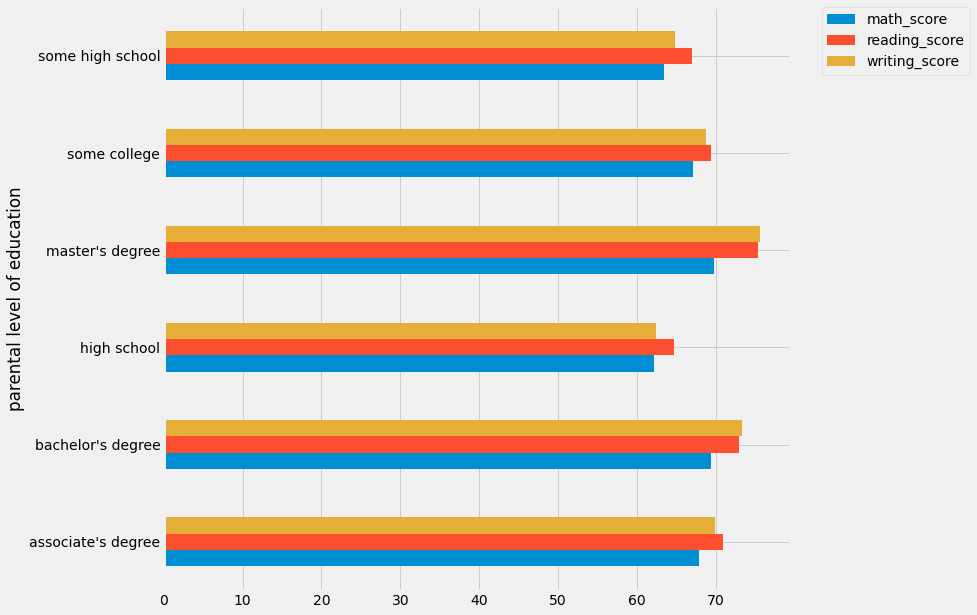

In [124]:
df[['math_score','reading_score','writing_score','parental level of education']].groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 1.6.4 Lunch

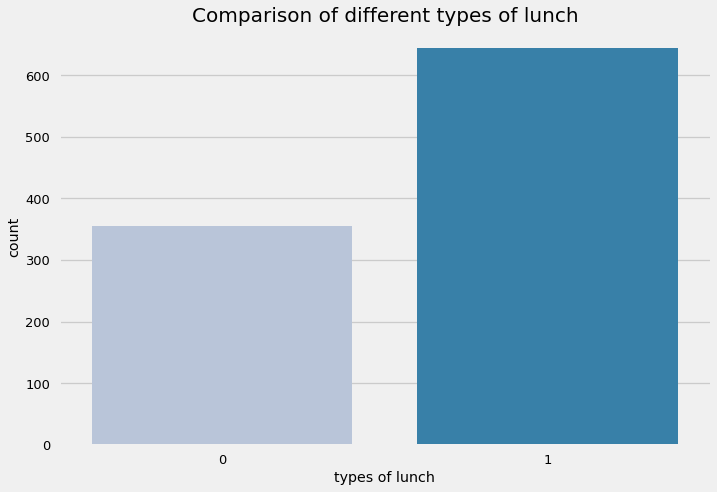

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data = df, x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

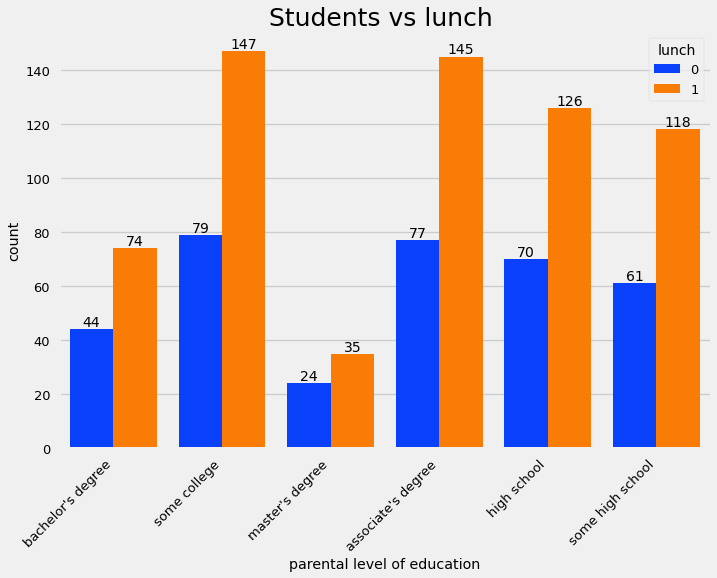

In [158]:
ax = sns.countplot(x='parental level of education',data=df,palette = 'bright',hue='lunch',saturation=0.95)
plt.title('Students vs lunch ',color='black',size=25)
plt.xticks( rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


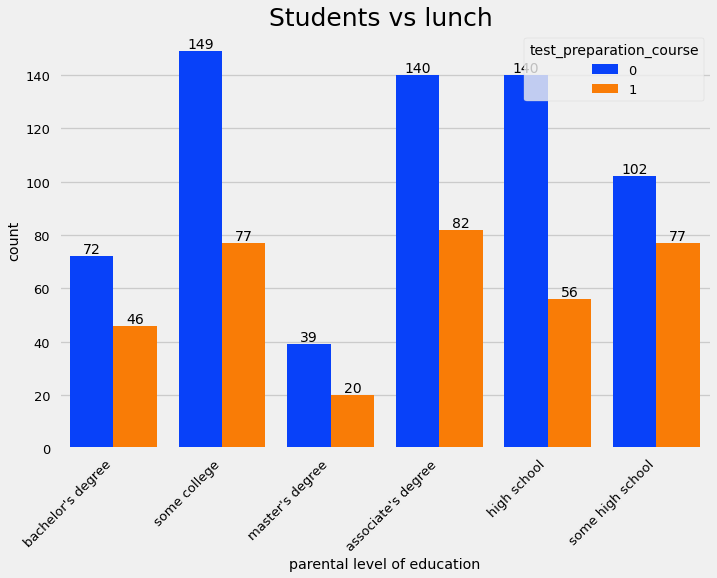

In [159]:
ax = sns.countplot(x='parental level of education',data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95)
plt.title('Students vs lunch ',color='black',size=25)
plt.xticks( rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container)
plt.show()
    
    

### 1.6.5 Test preparation

<Axes: xlabel='lunch', ylabel='writing_score'>

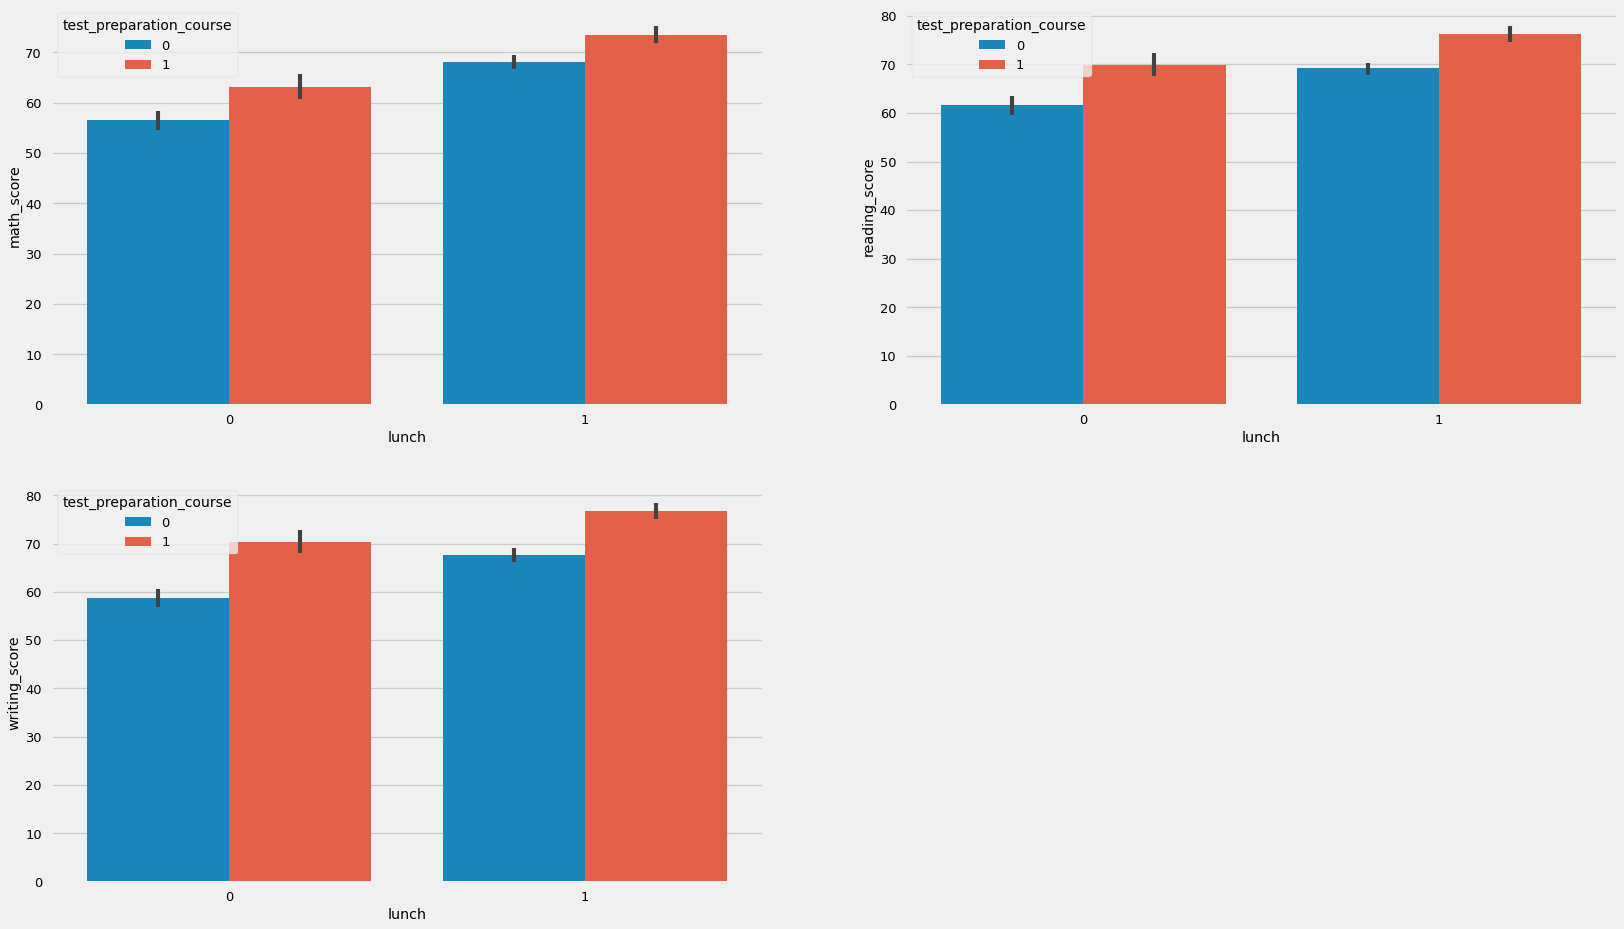

In [161]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

## 1.7 Outliers

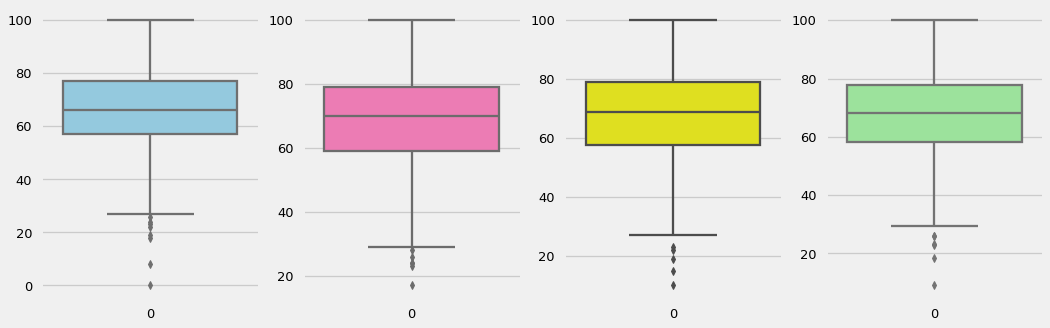

In [163]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

## 1.8 MUTIVARIATE ANALYSIS USING PAIRPLOT

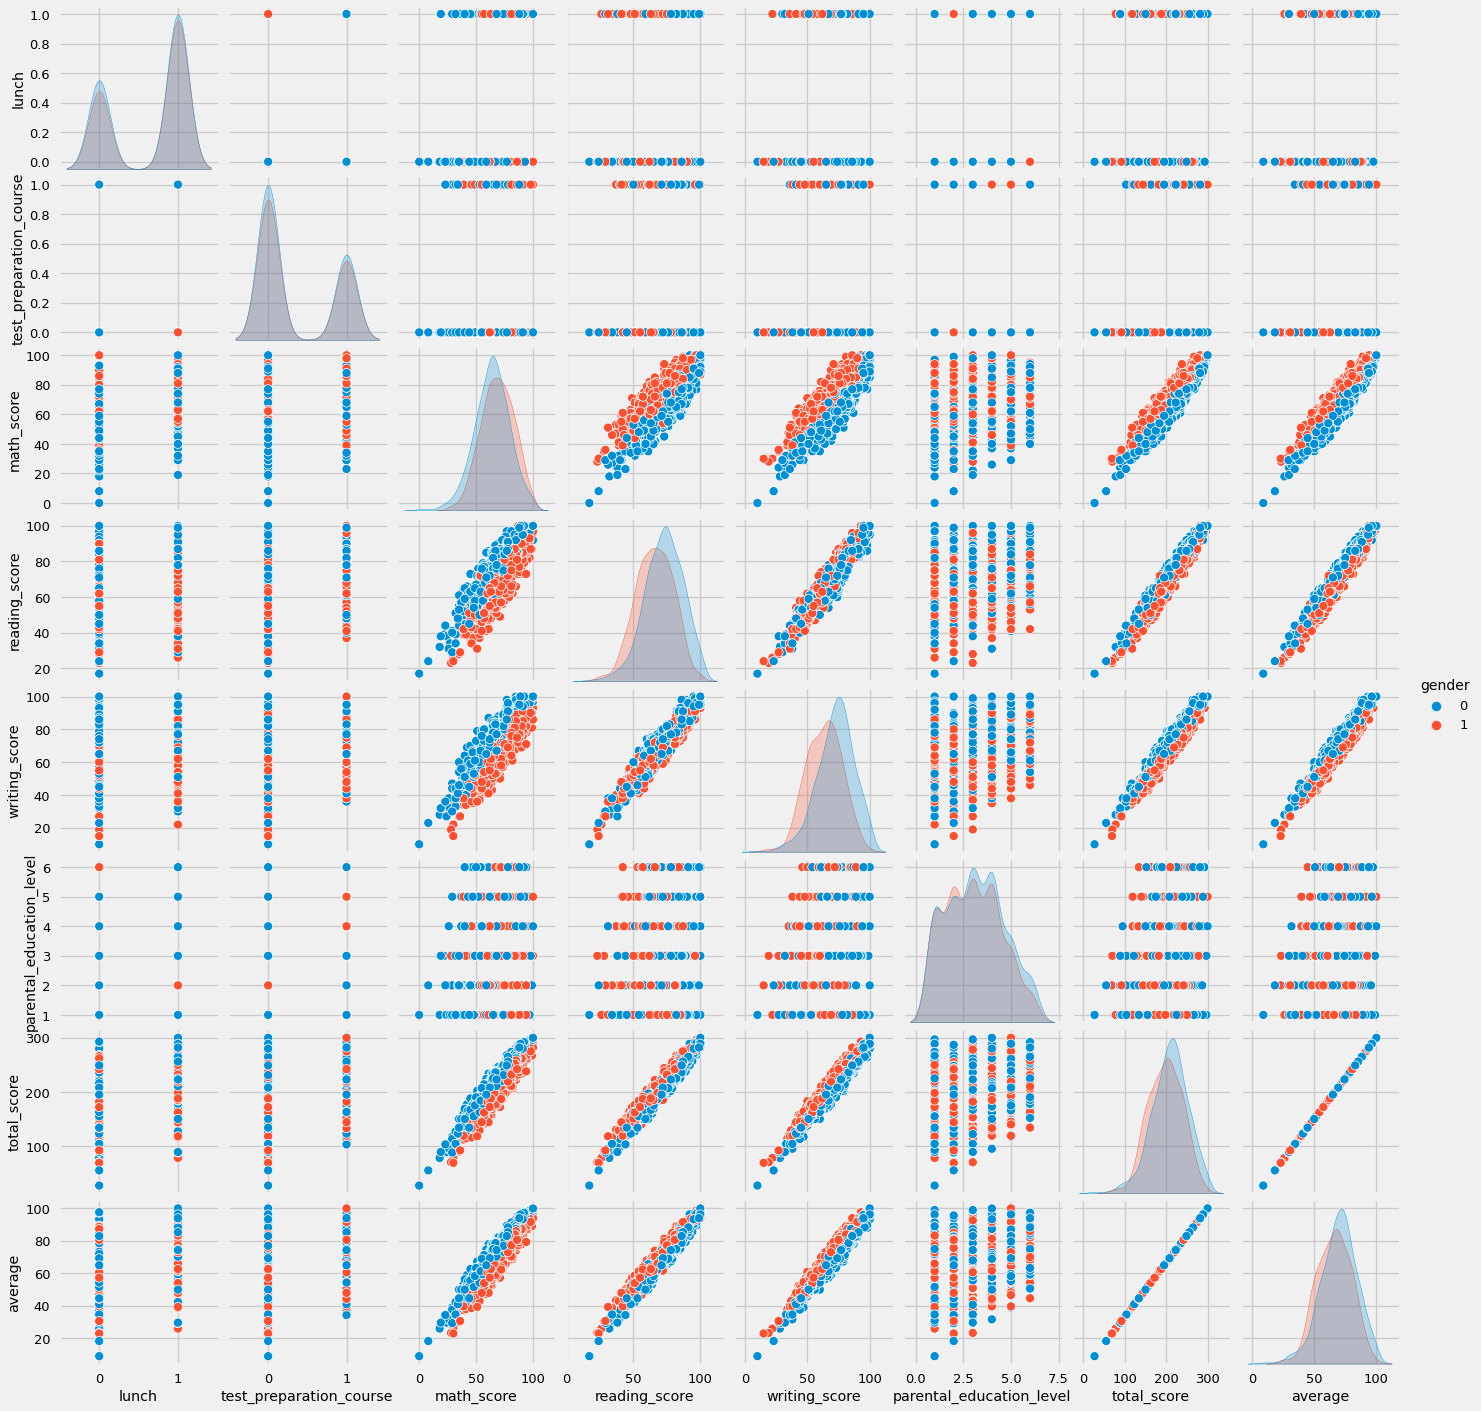

In [164]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
* From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions
* Student's Performance is related with lunch, race, parental level education
* Females lead in pass percentage and also are top-scorers
* Student's Performance is not much related with test preparation course
* Finishing preparation course is benefitial.